In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline  # Import Pipeline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the data
df = pd.read_excel("UpdatedStudentSurvey.xlsx")
df

,Gender,Age,Ethnicity,Religion,Parents Work,Siblings,Housing,Current GPA,Desired GPA,Absences,...,Future Planned,Career Option 1,Career Option 2,Career Option 3,Interested Career 1,Interested Career 2,Interested Career 3,Skill 1,Skill 2,Skill 3
0,Male,19,Chinese,Buddhist,Both Works,2,HDB,2.71,2.86,0,...,Not yet,Nan,Nan,Nan,Software Developer,Ai Analyst,Cybersecurity Expert,Code,Detailed,Adaptable
1,Male,21,Chinese,Buddhist,Both Works,2,HDB,0.98,1.50,6,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
2,Male,19,Chinese,Buddhist,Father Only,2,Condominium,2.86,3.30,0,...,Not yet,Nan,Nan,Nan,Entrepreneur,Food Reviewer,Food Vlogger,Innovative,Critical,Entertaining
3,Male,22,Chinese,Catholic,Both Works,2,Bungalow,3.10,4.00,7,...,Undecided,Nan,Nan,Nan,Nan,Nan,Nan,Detailed,Nan,Nan
4,Male,19,Chinese,Buddhist,Both Works,1,HDB,3.00,3.50,1,...,Undecided,Nan,Nan,Nan,Engineer,Nan,Nan,Nan,Nan,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Female,19,Indian,Islam,Both Works,2,HDB,3.45,3.60,3,...,Not yet,Nan,Nan,Nan,Teacher,Hospital Lab,Pharmacist,Precision,Laboratory Skills,Timeliness
197,Male,19,Chinese,Buddhist,Mother Only,2,HDB,2.90,3.50,0,...,Undecided,Nan,Nan,Nan,Translator,Reporter,Sports Commentator,Language,Outspoken,Confidence
198,Female,19,Chinese,Christian,Both Works,2,Condominium,2.40,3.00,1,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
199,Female,24,Chinese,Christian,Mother Only,4,HDB,1.81,2.50,0,...,Planned,Nurse,Journalist,Nan,Nan,Nan,Nan,Patience,Writing Skills,Communication Skills


In [41]:
# Select relevant columns
df = df[['Video Games', 'Game Hours', 'Part-Time', 'CCAs Participated', 'School Satisfaction Level', 'Current GPA', 'Absences']]

In [42]:
# Convert categorical variables to numeric (assuming they are categorical)
df['Video Games'] = df['Video Games'].map({'Yes': 1, 'No': 0})
df['Part-Time'] = df['Part-Time'].map({'Yes': 1, 'No': 0})
df['CCAs Participated'] = df['CCAs Participated'].map({'Yes': 1, 'No': 0})

C:\Users\22023518\AppData\Local\Temp\ipykernel_20936\1172278137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Video Games'] = df['Video Games'].map({'Yes': 1, 'No': 0})
C:\Users\22023518\AppData\Local\Temp\ipykernel_20936\1172278137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Part-Time'] = df['Part-Time'].map({'Yes': 1, 'No': 0})
C:\Users\22023518\AppData\Local\Temp\ipykernel_20936\1172278137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [43]:
# Convert 'Game Hours' ranges to numeric values by taking the mean of the range
def convert_range_to_mean(hours):
    if '-' in hours:
        low, high = map(int, hours.split('-'))
        return (low + high) / 2
    elif hours.isdigit():
        return int(hours)
    else:
        return np.nan

df['Game Hours'] = df['Game Hours'].apply(convert_range_to_mean)

C:\Users\22023518\AppData\Local\Temp\ipykernel_20936\1001587688.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Game Hours'] = df['Game Hours'].apply(convert_range_to_mean)


In [44]:
# Define features and target
X = df[['Video Games', 'Game Hours', 'Part-Time', 'CCAs Participated', 'School Satisfaction Level', 'Current GPA']]
y = df['Absences']

In [45]:
# Check for missing values and impute if necessary
print("Missing values before imputation:\n", X.isna().sum())
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
print("Missing values after imputation:\n", pd.DataFrame(X_imputed, columns=X.columns).isna().sum())

Missing values before imputation:
 Video Games                    0
Game Hours                   106
Part-Time                      0
CCAs Participated              0
School Satisfaction Level      0
Current GPA                    0
dtype: int64
Missing values after imputation:
 Video Games                  0
Game Hours                   0
Part-Time                    0
CCAs Participated            0
School Satisfaction Level    0
Current GPA                  0
dtype: int64


In [46]:
# Create a pipeline that includes imputation, polynomial feature generation, and scaling
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)),
    ('scaler', StandardScaler())
])

In [47]:
# Apply pipeline to features
X_poly_scaled = pipeline.fit_transform(X_imputed)

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.25, random_state=42)

In [49]:
# Initialize Ridge regression and Grid Search
model = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]}, scoring='r2',
             verbose=1)

In [50]:
# Best model from grid search
best_model = grid_search.best_estimator_

In [51]:
# Make predictions
y_pred = best_model.predict(X_test)

In [52]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Best Parameters: {grid_search.best_params_}")

Mean Squared Error: 8.194766389808075
R^2 Score: 0.03291345826266778
Best Parameters: {'alpha': 100.0}


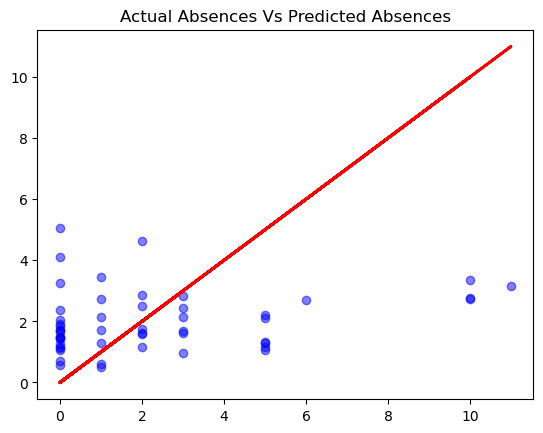

In [54]:
# Plot actual vs. predicted values
plt.title('Actual Absences Vs Predicted Absences')
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, y_test, color='red', linewidth=2)  # Line of fit